In [32]:
import numpy as np 
import pandas as pd 

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
print(crop.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum

<bound method DataFrame.sum of           N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]>

In [6]:
crop.duplicated().sum()

np.int64(0)

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
corr = crop.select_dtypes(include='number').corr()
print(corr)


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<Axes: >

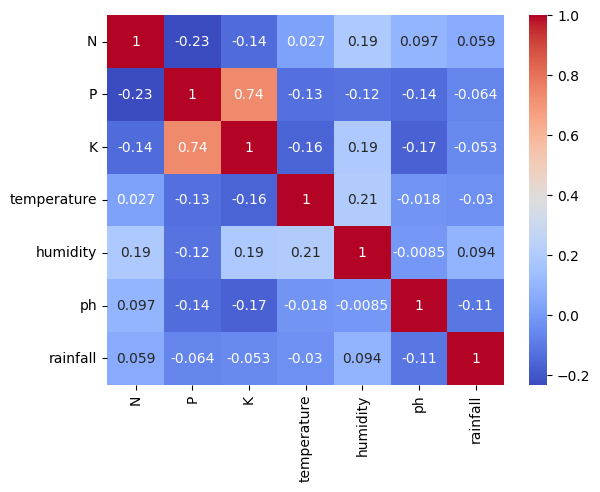

In [9]:
import seaborn as sns 
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

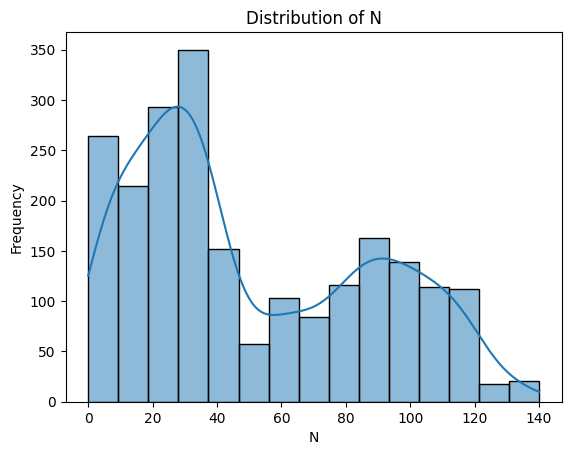

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'N' column from the DataFrame
sns.histplot(crop['N'], kde=True)
plt.title('Distribution of N')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()



In [12]:
crop_dict={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgrain':16,
    'mugbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpeas':21,
    'coffee':22
}
# Create a new column 'crop_num' by mapping crop names in 'label' column to numbers
crop['crop_num'] = crop['label'].map(crop_dict)

# If you want to see the result:
print(crop[['label', 'crop_num']])


       label  crop_num
0       rice       1.0
1       rice       1.0
2       rice       1.0
3       rice       1.0
4       rice       1.0
...      ...       ...
2195  coffee      22.0
2196  coffee      22.0
2197  coffee      22.0
2198  coffee      22.0
2199  coffee      22.0

[2200 rows x 2 columns]


In [13]:
crop['crop_num'].value_counts()

crop_num
1.0     100
2.0     100
20.0    100
19.0    100
18.0    100
15.0    100
14.0    100
13.0    100
12.0    100
11.0    100
10.0    100
9.0     100
8.0     100
7.0     100
6.0     100
5.0     100
4.0     100
3.0     100
22.0    100
Name: count, dtype: int64

In [14]:
#crop.drop(['label'],axis=1,Inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.0


In [15]:
x=crop.drop('crop_num',axis=1)
y=crop['crop_num']

In [16]:
x.shape

(2200, 8)

In [17]:
y.shape

(2200,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [20]:
x_train.shape

(1760, 8)

In [21]:
x_test.shape

(440, 8)

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-numeric columns
x_train_numeric = x_train.select_dtypes(include='number')
x_test_numeric = x_test.select_dtypes(include='number')

# Scale only the numeric columns
ms = MinMaxScaler()
ms.fit(x_train_numeric)

x_train_scaled = ms.transform(x_train_numeric)
x_test_scaled = ms.transform(x_test_numeric)


In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop non-numeric columns
x_train_numeric = x_train.select_dtypes(include='number')
x_test_numeric = x_test.select_dtypes(include='number')

# Standard scaling
sc = StandardScaler()
sc.fit(x_train_numeric)

x_train_scaled = pd.DataFrame(sc.transform(x_train_numeric), columns=x_train_numeric.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(sc.transform(x_test_numeric), columns=x_test_numeric.columns, index=x_test.index)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [25]:
x_train

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
)
from sklearn.metrics import accuracy_score

# Load your DataFrame here
# crop = pd.read_csv('your_file.csv')  # <-- Make sure your data is loaded

# Check columns
print("Columns in crop DataFrame:", crop.columns)

# Replace 'label' with your actual target column name
X = crop.drop('label', axis=1)
y = crop['label']

# Separate categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# Handle missing values
if not num_cols.empty:
    num_imputer = SimpleImputer(strategy='mean')
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

if not cat_cols.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

    # Encode categorical features
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Encode target if it's categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train/test split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

# Train and evaluate each model
for name, md in models.items():
    md.fit(x_train, y_train)
    ypred = md.predict(X_test)
    acc = accuracy_score(y_test, ypred)
    print(f"{name} Accuracy: {acc:.2f}")


Columns in crop DataFrame: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'crop_num'],
      dtype='object')


C:\Users\yamini\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.99
Naive Bayes Accuracy: 1.00
Support Vector Machine Accuracy: 0.96
K-Nearest Neighbors Accuracy: 0.97
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Bagging Accuracy: 1.00
AdaBoost Accuracy: 0.10
Gradient Boosting Accuracy: 1.00
Extra Trees Accuracy: 1.00


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)          # x_train was used for training
ypred = rfc.predict(X_test)        # Use X_test (same features, same structure)

acc = accuracy_score(y_test, ypred)
print(f"Random Forest Accuracy: {acc:.2f}")


Random Forest Accuracy: 1.00


In [28]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features=np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(features).reshaped(1,-1)


    return prediction[0]

In [29]:
import numpy as np

# Example function with 8 features (adjust feature values accordingly)
def recommendation(N, P, K, temperature, humidity, ph, rainfall, crop_num):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall, crop_num]])
    prediction = rfc.predict(features)
    return prediction[0]

# Input values
N = 20
P = 30
K = 40
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50
crop_num = 5  # Add this based on your data structure (e.g., encoded value)

# Predict
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall, crop_num)

# Crop dictionary
crop_dict = {
    1: 'Rice',
    2: 'Maize',
    3: 'Jute',
    4: 'Cotton',
    5: 'Coconut',
    6: 'Papaya',
    7: 'Orange',
    8: 'Apple',
    9: 'Muskmelon',
    10: 'Watermelon',
    11: 'Grapes',
    12: 'Mango',
    13: 'Banana',
    14: 'Pomegranate',
    15: 'Lentil',
    16: 'Blackgrain',
    17: 'Mugbean',
    18: 'Mothbeans',
    19: 'Pigeonpeas',
    20: 'Kidneybeans',
    21: 'Chickpeas',
    22: 'Coffee'
}

if predict in crop_dict:
    crop = crop_dict[predict]
    print(f"{crop} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend the proper crop for this environment.")


Mango is the best crop to be cultivated.


C:\Users\yamini\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import requests

API_KEY = "73bc84e3fa2152d5e8812e88e4ce1671" # Replace with your actual API key
CITY = "Warangal"

def get_weather(city):
    url = f"https://api.openweathermap.org/data/2.5/weather?q=Warangal&appid=73bc84e3fa2152d5e8812e88e4ce1671&units=metric"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Error: Unable to fetch weather data (Status code: {response.status_code})")
        print("Response:", response.json())
        return None, None
    
    data = response.json()

    if 'main' in data:
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        return temp, humidity
    else:
        print("Error: 'main' key not found in response.")
        print("Response:", data)
        return None, None

temperature, humidity = get_weather(CITY)

if temperature is not None and humidity is not None:
    print("Temperature:", temperature, "°C")
    print("Humidity:", humidity, "%")
else:
    print("Failed to retrieve weather data.")


Temperature: 31.4 °C
Humidity: 42 %


In [31]:
import pickle 
pickle.dump(rfc,open('model.pkl','wb'))